# **Introduction to Cross Validation and Model Selection**

In a previous article, we created a model with l2 or ridge regularization and l1 or lasso regularization. In both cases, an apparently optimum value of the regularization parameter was found. This process is an example of **model selection**. The goal of model selection is to find the best performing model for the problem at hand. Model selection is a very general term and can apply to at least the following common cases:
- Selection of optimal model **hyperparameters**. Hyperparameters are parameters which determine the characteristics of a model. Hyperparameters are distinct from the model parameters. For example, for the case of l2 regularized regression, the degree of regularization is determined by a hyperparameter, which is distinct from the regression coefficients or parameters. 
- **Feature selection** is the process of determining which features should be used in a model. 
- Comparing different model types is an obvious case of model selection. 

If you are thinking that the model selection process is closely related to model training, you are correct. Model selection is a component of model training. However, one must be careful, as applying a poor model selection method can lead to an over-fit model!

 
## **Types of Cross validation**

There are various types of cross validation techniques in practices. Most popular ones are:

 1. K-fold
 2. Repeated K-Fold
 3. Leave 1 out
 4. Leave p out
 5. Random permutations cross-validation
 6. Stratified K-fold
 7. Stratified Shuffle Split
 8. Group k-fold
 9. Leave One Group Out
 10. Leave P Groups Out
 11. Group Shuffle Split
 12. Time Series Split

## **Overview of k-fold cross validation**

The questions remain, how good are the hyperparameter estimates previously obtained for the l2 and l1 regularization parameters and are there better ways to estimate these parameters? The answer to both questions is to use **resampling methods**. Resampling methods repeat a calculation multiple times using randomly selected subsets of the complete dataset.  In fact, resampling methods are generally the best approach to model selection problems.

**K-folod Cross validation** is a widely used resampling method. In cross validation a dataset is divided into **k folds**. Each fold contains $\frac{1}{k}$ cases and is created by **Bernoulli random sampling** of the full data set. A computation is performed on $k-1$ folds of the full dataset. The $k^{th}$ fold is **held back** and is used for testing the result. The computation is performed $k$ times and model parameters are averaged (mean taken) over the results of the $k$ folds. For each iteration, $k-1$ folds are used for training and the $k^{th}$ fold is used for testing. 

4-fold cross validation is illustrated in the figure below. To ensure the data are randomly sampled the data is randomly shuffled at the start of the procedure. The random samples can then be efficiently sub-sampled as shown in the figure. The model is trained and tested four times. For each iteration the data is trained with three folds of the data and tested with the fold shown in the dark shading. 

![Cross validation](Crossvalidation.jpg)

## **Introduction to nested cross validation**

Unfortunately, simple cross validation alone does not provide an unbiased approach to model selection. The problem with evaluating model performance with simple cross validation uses the same data samples as the model selection process. This situation will lead to model over fitting wherein the model selection is learned based on the evaluation data. The result is usually unrealistically optimistic model performance estimates.

To obtain unbiased estimates of expected model performance while performing model selection, it is necessary to use **nested cross validation**. As the name implies, nested cross validation is performed though a pair of nested CV loops. The outer loop uses a set of folds to perform model evaluation. The inner loop performs model selection using another randomly sampled set of  folds not used for evaluation by the outer loop. This algorithm allows model selection and evaluation to proceed with randomly sampled subsets of the full data set, thereby avoiding model selection bias. 

## **Cross validation and computational efficiency**

As you may have surmised, cross validation can be computationally intensive. Processing each fold of a cross validation requires fitting and evaluating the model. It is desirable to compute a reasonable number of folds. Since the results are averaged over the folds, a small number of folds can lead to significant variability in the final result. However, with large data sets or complex models, the number of folds must be limited in order to complete the cross validation process in a reasonable amount of time. It is, therefore, necessary to trade off accuracy of the cross validation result with the practical consideration of the required computational resources. 

As mentioned earlier, other resampling methods exist. For example, leave-one-out resampling has the same number of folds as data cases. Such methods provide optimal unbiased estimates of model performance. Unfortunately, as you might think, such methods are computationally intensive and are only suitable for small datasets. In practice k-fold cross validation is a reasonable way to explore bias-variance trade-off with reasonable computational resources. 


# **Example**

## **Getting started**

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setting the path
import os
os.chdir("/content/drive/My Drive/Introduction to Data Science - Python edition/dataset/titanic")

In [0]:
# Loading libraries
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy.random as nr
import matplotlib.pyplot as plt
import math

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
# load npy file
X_train = np.load('X_train.npy')
X_validation = np.load('X_validation.npy')
X_test = np.load('X_test.npy')

y_train = np.load('y_train.npy')
y_validation = np.load('y_validation.npy')
y_test = np.load('y_test.npy')

In [13]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, penalty = 'none', solver = 'lbfgs')
LR = LR.fit(X_train, y_train)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        72                10
Actual negative        12                40

Accuracy        0.84
AUC             0.88
Macro precision 0.83
Macro recall    0.82
 
           Positive      Negative
Num case       82            52
Precision    0.86          0.80
Recall       0.88          0.77
F1           0.87          0.78


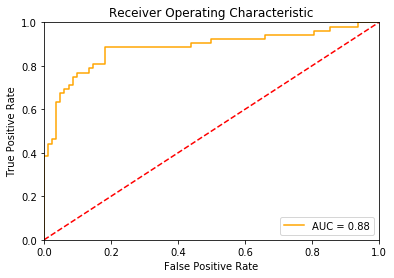

In [14]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = LR.predict_proba(X_validation)
print_metrics(y_validation, probabilities, 0.5)  
plot_auc(y_validation, probabilities)

In [0]:
#Labels = Labels.reshape(Labels.shape[0],)
from sklearn.model_selection import StratifiedKFold, KFold
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
#scoring = 'roc_auc'
LR = LogisticRegression(random_state=0, penalty = 'none', solver = 'lbfgs')
skf = StratifiedKFold(n_splits=10)
scores = ms.cross_validate(LR, X_train, y_train, scoring=scoring,
                        cv=skf, return_train_score=False)

In [29]:
scores

{'fit_time': array([0.02764559, 0.01775479, 0.01971483, 0.01689982, 0.01523209,
        0.01907897, 0.01997137, 0.02007604, 0.0188024 , 0.01617217]),
 'score_time': array([0.00286365, 0.00300312, 0.0030942 , 0.00293589, 0.00278568,
        0.00273728, 0.00270271, 0.00263095, 0.00265932, 0.00290751]),
 'test_precision_macro': array([0.75872093, 0.80380435, 0.73232848, 0.76282051, 0.76785714,
        0.76363636, 0.79008568, 0.84166667, 0.84166667, 0.79605263]),
 'test_recall_macro': array([0.73421053, 0.79421053, 0.73878205, 0.76973684, 0.74671053,
        0.75438596, 0.75986842, 0.81469298, 0.81469298, 0.79605263]),
 'test_roc_auc': array([0.81210526, 0.89263158, 0.83974359, 0.80701754, 0.77686404,
        0.84649123, 0.85745614, 0.89583333, 0.88870614, 0.88267544])}

In [30]:
print(np.mean(scores['test_roc_auc']))
print(np.std(scores['test_roc_auc']))

0.8499524291497975
0.03910171910164869


In [20]:
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(scores) 

         Precision     Recall       AUC
Fold  1    0.759        0.734      0.812
Fold  2    0.804        0.794      0.893
Fold  3    0.732        0.739      0.840
Fold  4    0.763        0.770      0.807
Fold  5    0.768        0.747      0.777
Fold  6    0.764        0.754      0.846
Fold  7    0.790        0.760      0.857
Fold  8    0.842        0.815      0.896
Fold  9    0.842        0.815      0.889
Fold 10    0.796        0.796      0.883
----------------------------------------
Mean       0.786        0.772      0.850
Std        0.034        0.029      0.039
